In [1]:
# import the libraries
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Dataset
df = pd.read_csv('datasets/Restaurant_Reviews.tsv',sep = '\t', quoting = 3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
print(df.shape)
print(df.isna().sum())

(1000, 2)
Review    0
Liked     0
dtype: int64


In [4]:
import re
import nltk
# un comment nltk.download('stopwords') if you're running for the first time
#nltk.download('stopwords')         # Download stopwords from nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus = []

# Iterating through all the reviews
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review  = review.split()
    
    ps = WordNetLemmatizer()
    words = stopwords.words('english')
    words.remove('not')
    words.remove('no')
    words.remove('but')
    words.remove('is')
    words.remove('this')
    review = [ps.lemmatize(word) for word in review if not word in set(words)]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
y = df["Liked"]

##### SVC Linear kernel with 10 % test data

In [6]:
x_train,x_test,y_train,y_test = train_test_split(corpus,y,test_size = 0.1, random_state = 25)
Clf_svc = Pipeline([('tfIdf',TfidfVectorizer()),('cl',SVC(kernel = 'linear')),])
Clf_svc.fit(x_train,y_train)
pred = Clf_svc.predict(x_test)

confusion matrix : 
[[43  6]
 [ 7 44]]
Accuracy :  0.87


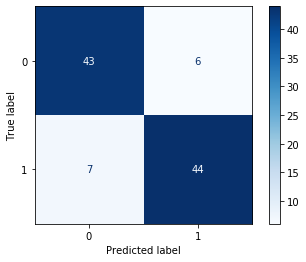

In [7]:
plot_confusion_matrix(Clf_svc, x_test, y_test, cmap = plt.cm.Blues)

print("confusion matrix : ")
cm = confusion_matrix(y_test,pred)
print(cm)
print("Accuracy : ", accuracy_score(y_test,pred))

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.88      0.86      0.87        51

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [9]:
data1 = pd.read_csv('datasets/Restaurant_reviews_test.tsv',sep = '\t', quoting = 3)
data1.head()

,Review,Liked
0,I really liked this hamburger,1
1,I like this,1
2,Very bad food.,0
3,Foods are very tasty. Behaviour is good. Hygie...,1
4,The breakfast brunch was great.,1


In [10]:
data = [[56,57,54,2], 
        [71,70,68,3]] 

In [11]:
df1 = pd.DataFrame(data, columns = ['Actual','Prediction','Right Prediction','Wrong Prediction'] ,
                   index = ['Bad(0)','Good(1)']) 

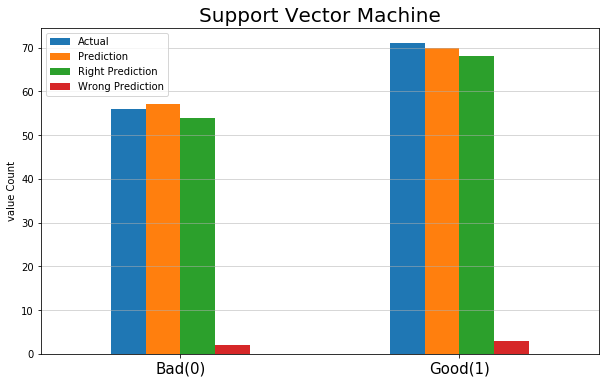

In [12]:
ax = df1.plot.bar(figsize = (10,6))
ax.set_title('Support Vector Machine', fontsize = '20')
ax.set_ylabel('value Count')
labels = ['Bad(0)','Good(1)']
ax.set_xticklabels(labels,fontsize=15, rotation=360)
ax.grid(axis = 'y', linestyle='-', linewidth=0.5)

In [13]:
test_data_x = data1['Review']
test_data_y = data1['Liked']

In [14]:
pred_test_data = Clf_svc.predict(test_data_x)

In [15]:
print("confusion matrix : ")
cm = confusion_matrix(test_data_y,pred_test_data)
print(cm)
print("Accuracy : ", accuracy_score(test_data_y,pred_test_data))

print('\n')
from sklearn.metrics import classification_report
print(classification_report(test_data_y,pred_test_data))

confusion matrix : 
[[53  3]
 [ 5 66]]
Accuracy :  0.937007874015748


              precision    recall  f1-score   support

           0       0.91      0.95      0.93        56
           1       0.96      0.93      0.94        71

    accuracy                           0.94       127
   macro avg       0.94      0.94      0.94       127
weighted avg       0.94      0.94      0.94       127



### User can manually check inputs

In [1]:
user_review = input('review: ')

result = Clf_svc.predict([user_review])[0]
#Show the result
if(result < 1):
 print('\nNegative review 0')
else:
 print('\npositive review 1')

review: this food is good


NameError: name 'Clf_svc' is not defined